<a href="https://colab.research.google.com/github/S-AILAB/Car-Data-Analysis/blob/main/Car_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading all the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Data Inspection and Summary Statistics

In [ ]:
df = pd.read_csv("Datasets\car price.csv")

In [ ]:
# Review the dataset's basic structure
print("Dataset Overview:")
print(df.info())

print("\nFirst 5 Records:")
print(df.head())


print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 4819 non-null   int64  
 1   Manufacturer       4819 non-null   object 
 2   Model              4819 non-null   object 
 3   Prod_Year          4819 non-null   int64  
 4   Category           4819 non-null   object 
 5   Leather_Interioe   4819 non-null   object 
 6   Fuel_Type          4819 non-null   object 
 7   Engine Volume      4819 non-null   object 
 8   Kilometers_Driven  4733 non-null   float64
 9   Gear_Box_Type      4819 non-null   object 
 10  Drive_Wheel        4819 non-null   object 
 11  Selling_Date       4819 non-null   object 
 12  Wheel              4819 non-null   object 
 13  Color              4819 non-null   object 
 14  Airbags            4650 non-null   float64
 15  Price              4819 non-null   int64  
dtypes: flo

In [ ]:
df.dtypes

Id                     int64
Manufacturer          object
Model                 object
Prod_Year              int64
Category              object
Leather_Interioe      object
Fuel_Type             object
Engine Volume         object
Kilometers_Driven    float64
Gear_Box_Type         object
Drive_Wheel           object
Selling_Date          object
Wheel                 object
Color                 object
Airbags              float64
Price                  int64
dtype: object

In [ ]:
df

,Id,Manufacturer,Model,Prod_Year,Category,Leather_Interioe,Fuel_Type,Engine Volume,Kilometers_Driven,Gear_Box_Type,Drive_Wheel,Selling_Date,Wheel,Color,Airbags,Price
0,45624039,FORD,Mustang,2016,Cabriolet,Yes,Petrol,2.3 Turbo,75000.0,Tiptronic,Rear,02-03-2023,Left wheel,Silver,6.0,423370
1,45766794,MITSUBISHI,Pajero,1997,Jeep,No,Petrol,2.4,142000.0,Automatic,4x4,02-03-2023,Left wheel,Blue,6.0,156810
2,45709646,TOYOTA,RAV 4,2001,Jeep,No,Petrol,2,91000.0,Automatic,4x4,02-03-2023,Right-hand drive,Silver,4.0,108200
3,45816588,SUZUKI,Grand Vitara,2008,Jeep,No,Petrol,1.6,98000.0,Automatic,4x4,02-03-2023,Left wheel,Black,12.0,156810
4,45759758,MITSUBISHI,Pajero Mini,2006,Jeep,No,Petrol,0.7,314000.0,Manual,4x4,02-03-2023,Right-hand drive,Silver,2.0,43910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,45602856,LEXUS,IS 250,2015,Sedan,Yes,Petrol,2.5,90000.0,Tiptronic,Rear,05-05-2023,Left wheel,Silver,8.0,376330
4815,45089354,BMW,528,2014,Sedan,Yes,Petrol,2.0 Turbo,70000.0,Tiptronic,Rear,05-05-2023,Left wheel,Black,10.0,454730
4816,45264871,FORD,Escape,2011,Jeep,Yes,Petrol,3,104000.0,Automatic,4x4,05-05-2023,Left wheel,Black,6.0,166210
4817,45510310,TOYOTA,Land Cruiser,2008,Jeep,Yes,Petrol,4.7,138000.0,Automatic,4x4,05-05-2023,Left wheel,Black,10.0,517460


### Cleaning Columns

In [ ]:
df.rename(columns={'Engine Volume': 'Engine_Volume'}, inplace=True)


In [ ]:
# Convert to datetime
df['Selling_Date'] = pd.to_datetime(df['Selling_Date'], format='%d-%m-%Y', errors='coerce')


In [ ]:
df['Engine_Volume'] = [col.replace('Turbo',"") for col in df['Engine_Volume']]
df['Engine_Volume'] = pd.to_numeric(df['Engine_Volume'], errors='coerce')

### 2. Missing Value Treatment



In [ ]:
# Identify missing values
print("Missing Values Count per Column:")
print(df.isnull().sum())

Missing Values Count per Column:
Id                     0
Manufacturer           0
Model                  0
Prod_Year              0
Category               0
Leather_Interioe       0
Fuel_Type              0
Engine_Volume          0
Kilometers_Driven     86
Gear_Box_Type          0
Drive_Wheel            0
Selling_Date           0
Wheel                  0
Color                  0
Airbags              169
Price                  0
dtype: int64


Observation:-
we have missing values in kilometers_Driven and Airbags columns

In [ ]:

# Handle missing data by replacing with mean
df.fillna(df.Airbags.mean(), inplace=True)
df.fillna(df.Kilometers_Driven.mean(), inplace=True)


In [ ]:
# Verify missing values have been handled
print("\nMissing Values After Treatment:")
print(df.isnull().sum())



Missing Values After Treatment:
Id                   0
Manufacturer         0
Model                0
Prod_Year            0
Category             0
Leather_Interioe     0
Fuel_Type            0
Engine_Volume        0
Kilometers_Driven    0
Gear_Box_Type        0
Drive_Wheel          0
Selling_Date         0
Wheel                0
Color                0
Airbags              0
Price                0
dtype: int64


### 3. Outlier Detection and Treatment

In [ ]:
df.select_dtypes('int64','float64').head(2)

,Id,Prod_Year,Price
0,45624039,2016,423370
1,45766794,1997,156810


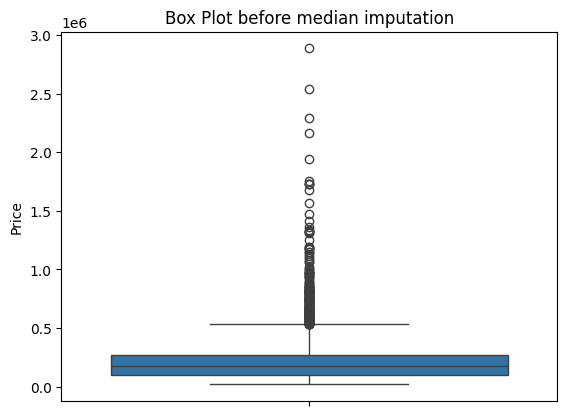

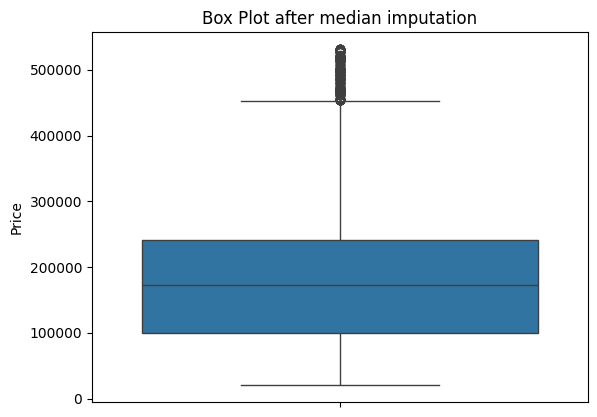

In [ ]:
# IQR
sns.boxplot(df['Price'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['Price'])
for i in df['Price']:
    if i > Upper_tail or i < Lower_tail:
            df['Price'] = df['Price'].replace(i, med)
sns.boxplot(df['Price'])
plt.title("Box Plot after median imputation")
plt.show()

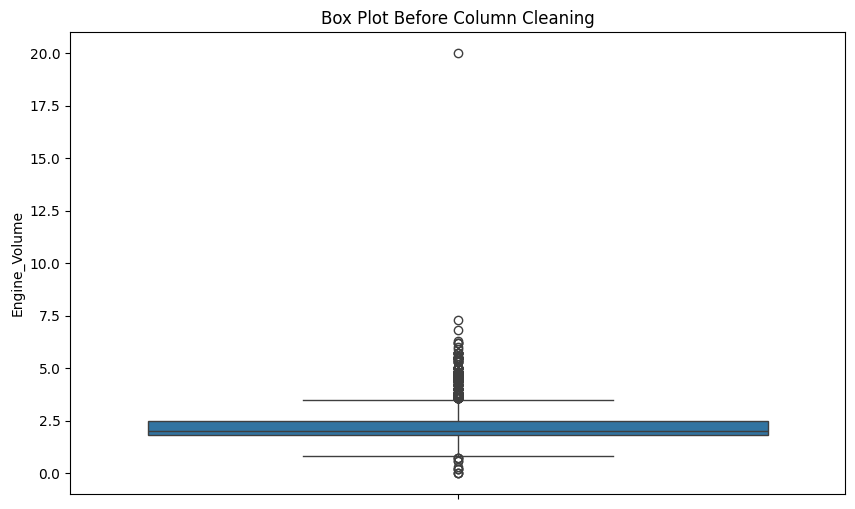

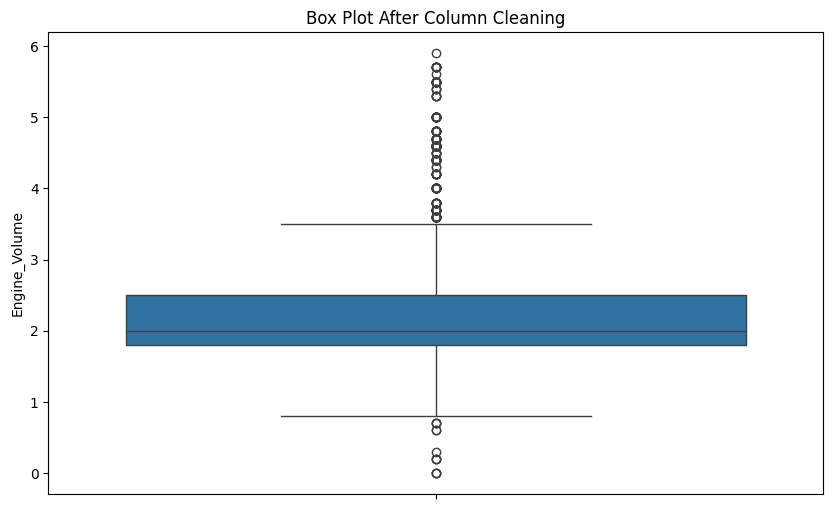

In [ ]:
# Box plot before cleaning
plt.figure(figsize=(10, 6))
sns.boxplot(df['Engine_Volume'])
plt.title("Box Plot Before Column Cleaning")
plt.show()

# Cleaning: Removing rows where Engine_Volume is greater than or equal to 6
df = df[df['Engine_Volume'] < 6]

# Box plot after cleaning
plt.figure(figsize=(10, 6))
sns.boxplot(df['Engine_Volume'])
plt.title("Box Plot After Column Cleaning")
plt.show()




## 3. Univariate Analysis  
Visualize individual variables to understand their distribution (e.g., histograms for numerical data, bar charts for categorical data).  
Make notes on any unique features or trends you observe.  

## 4. Bivariate and Multivariate Analysis  
Explore relationships between variables by visualizing pairs of variables or groups of variables (e.g., scatter plots, heatmaps).  
Document any significant patterns or correlations that emerge from your analysis.  


# Univariate Analysis

In [ ]:
df.columns

Index(['Id', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interioe', 'Fuel_Type', 'Engine_Volume', 'Kilometers_Driven',
       'Gear_Box_Type', 'Drive_Wheel', 'Selling_Date', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_10032\2331061696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Prod_Year', palette='viridis')


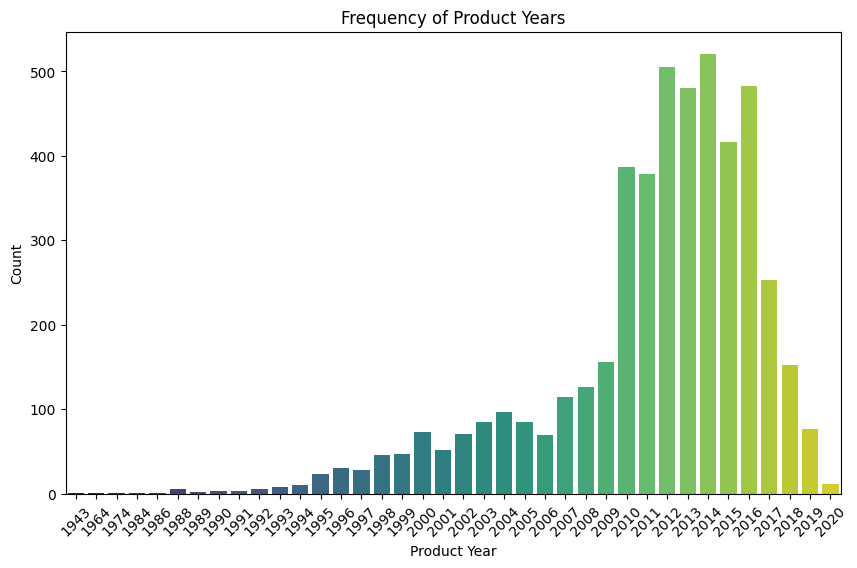

In [ ]:
# Bar plot to show frequency of each product year

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Prod_Year', palette='viridis')
plt.title('Frequency of Product Years')
plt.xlabel('Product Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

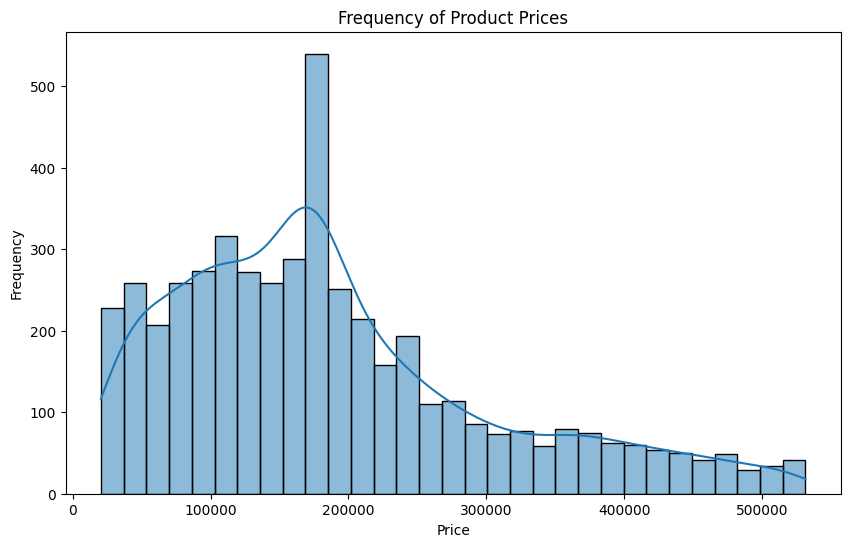

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', kde=True)
plt.title('Frequency of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


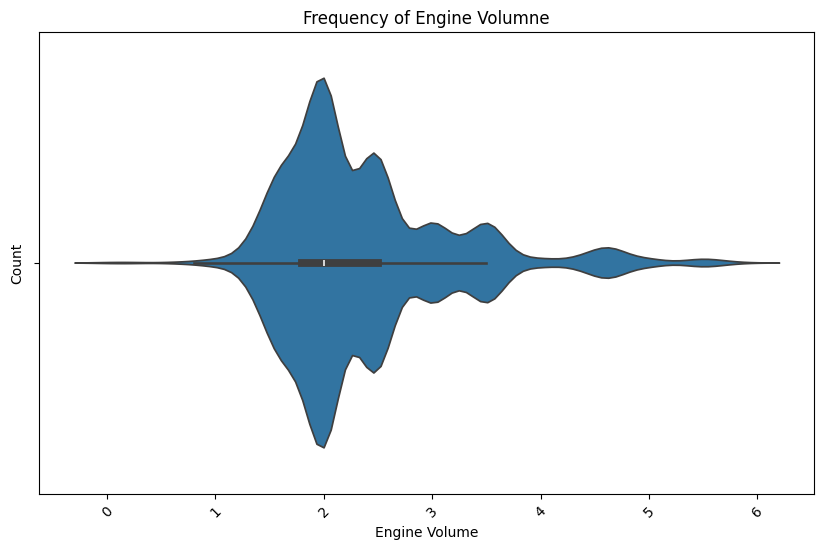

In [ ]:
# Plotting the frequency of values in 'Engine Volume'

plt.figure(figsize=(10,6))
sns.violinplot(x = 'Engine_Volume',data =df)

# Adding labels and title
plt.title('Frequency of Engine Volumne')
plt.xlabel('Engine Volume')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10032\3902244261.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Airbags', data=df, palette='viridis',kde=True)


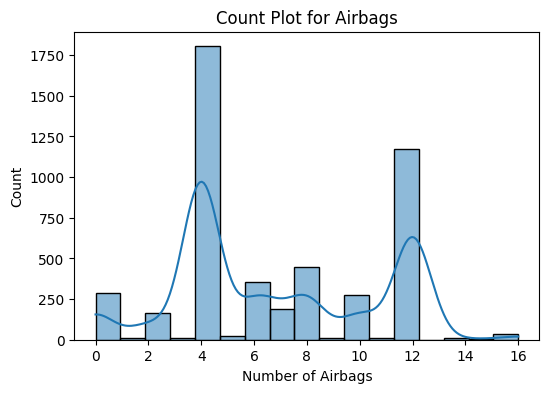

In [ ]:
# Count plot for the 'Airbags' column
plt.figure(figsize=(6, 4))
sns.histplot(x='Airbags', data=df, palette='viridis',kde=True)

# Adding title and labels
plt.title("Count Plot for Airbags")
plt.xlabel("Number of Airbags")
plt.ylabel("Count")
plt.show()


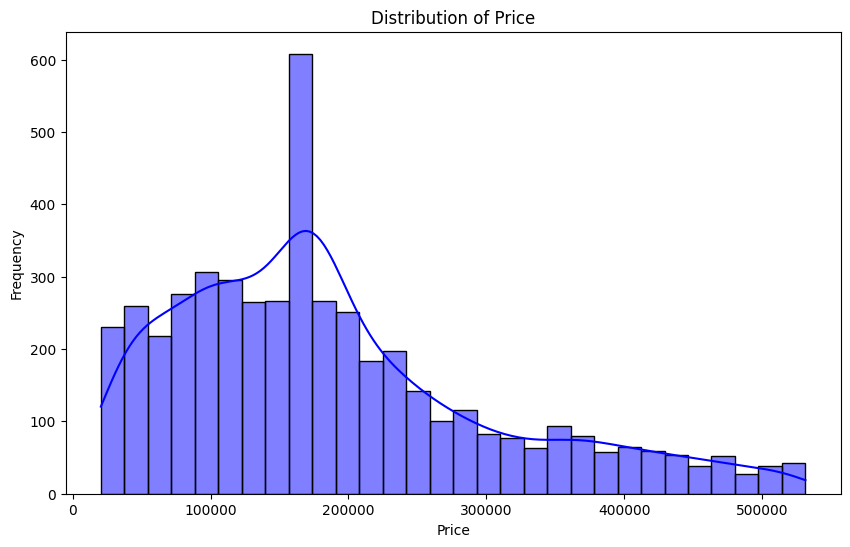

In [ ]:
# Histogram for 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue', bins=30)  # 'kde=True' adds a density curve
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


d:\cuvute\Modules\Ml Solutions\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


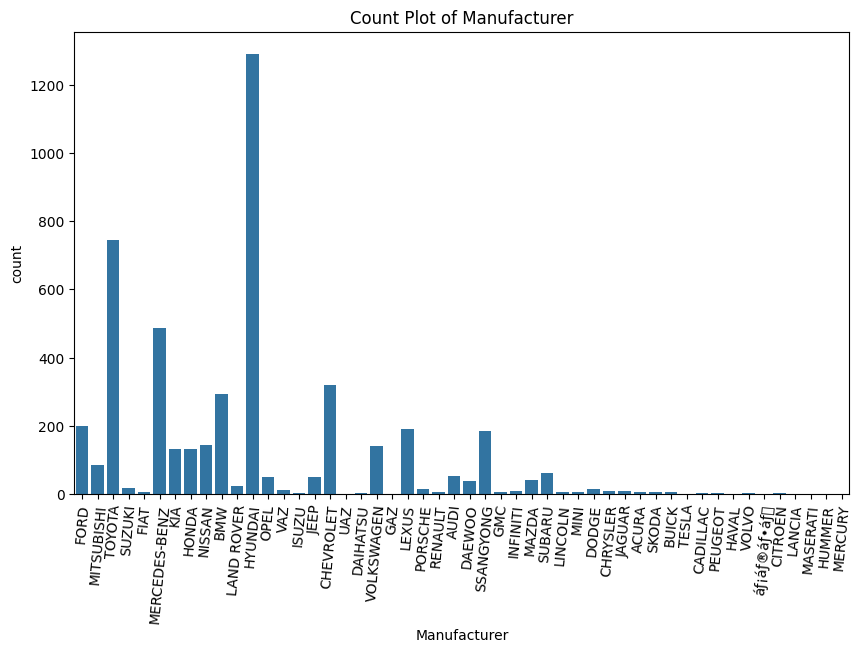

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Manufacturer')
plt.title('Count Plot of Manufacturer')
plt.xticks(rotation=85)
plt.show()


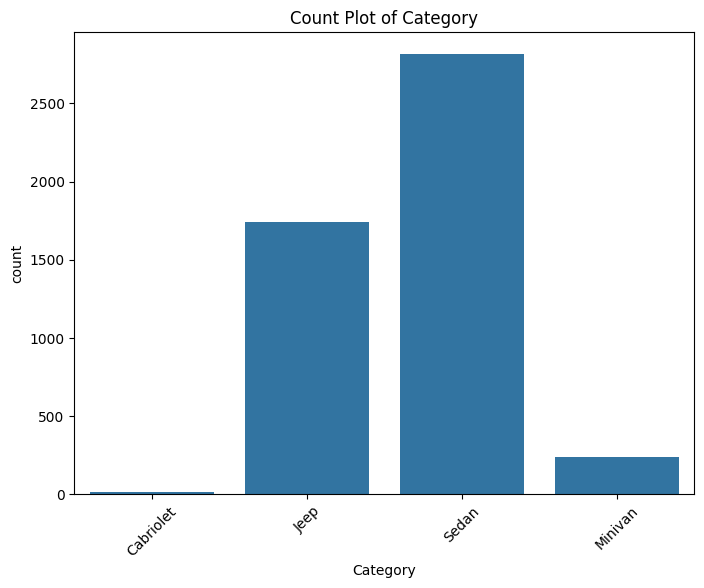

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title('Count Plot of Category')
plt.xticks(rotation=45)
plt.show()


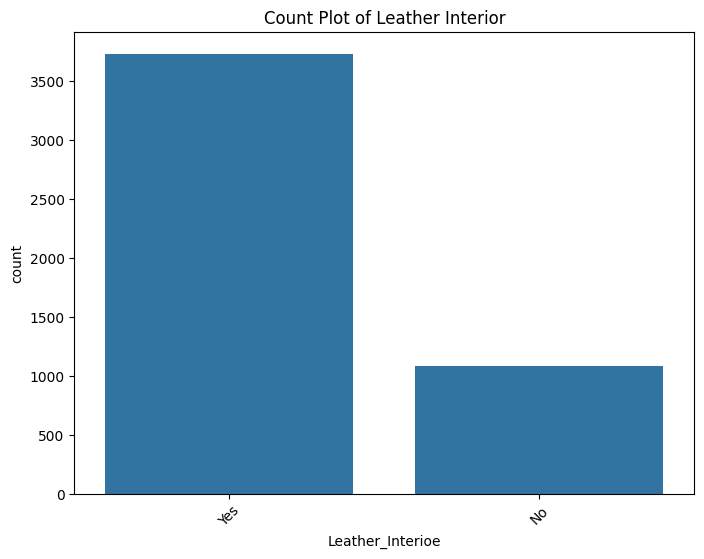

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Leather_Interioe')
plt.title('Count Plot of Leather Interior')
plt.xticks(rotation=45)
plt.show()


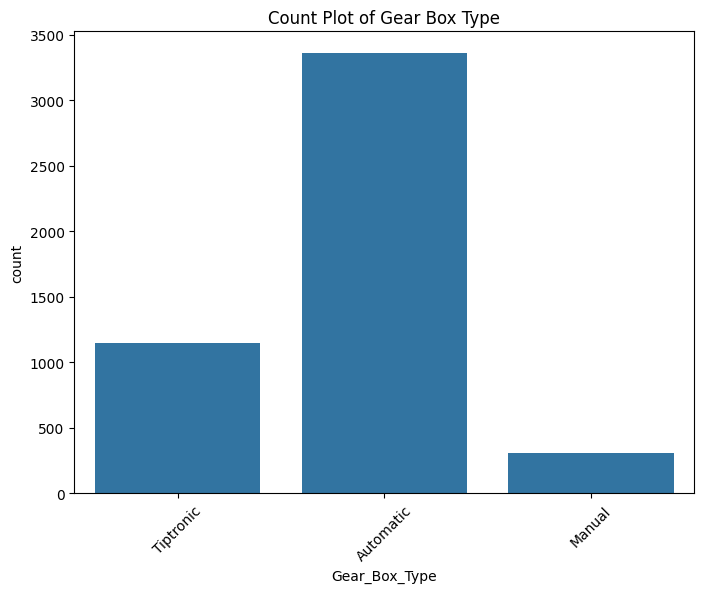

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gear_Box_Type')
plt.title('Count Plot of Gear Box Type')
plt.xticks(rotation=45)
plt.show()


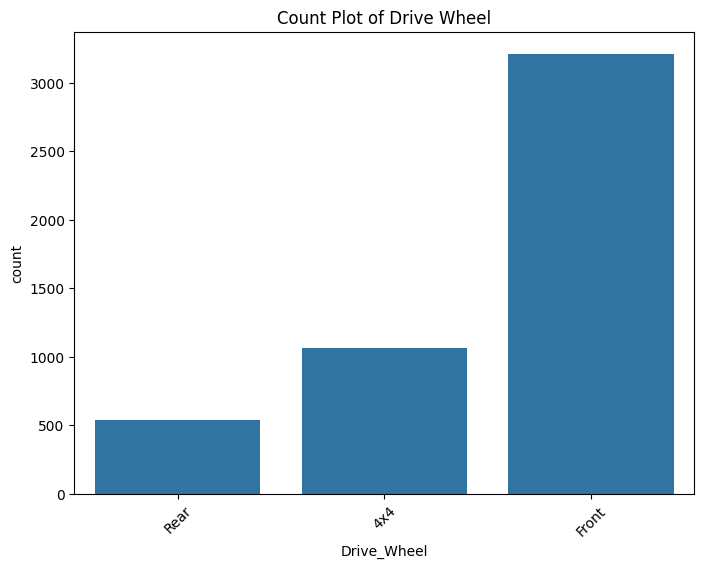

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Drive_Wheel')
plt.title('Count Plot of Drive Wheel')
plt.xticks(rotation=45)
plt.show()


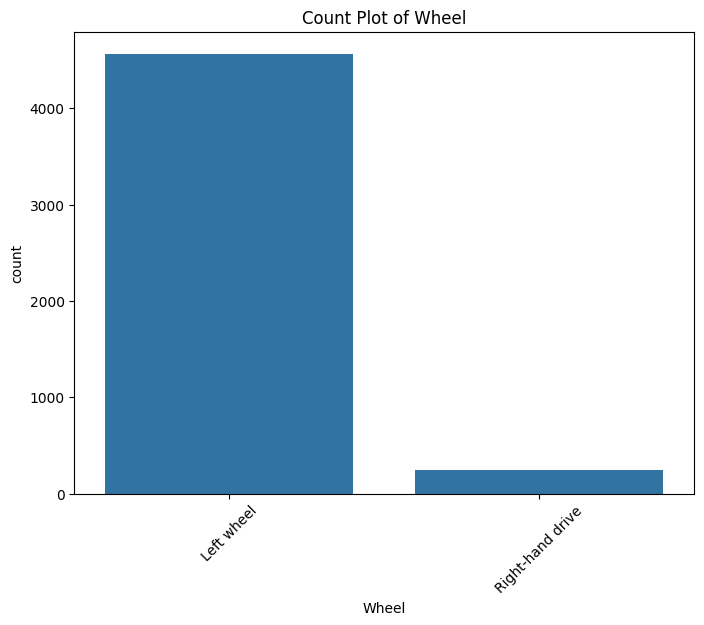

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Wheel')
plt.title('Count Plot of Wheel')
plt.xticks(rotation=45)
plt.show()


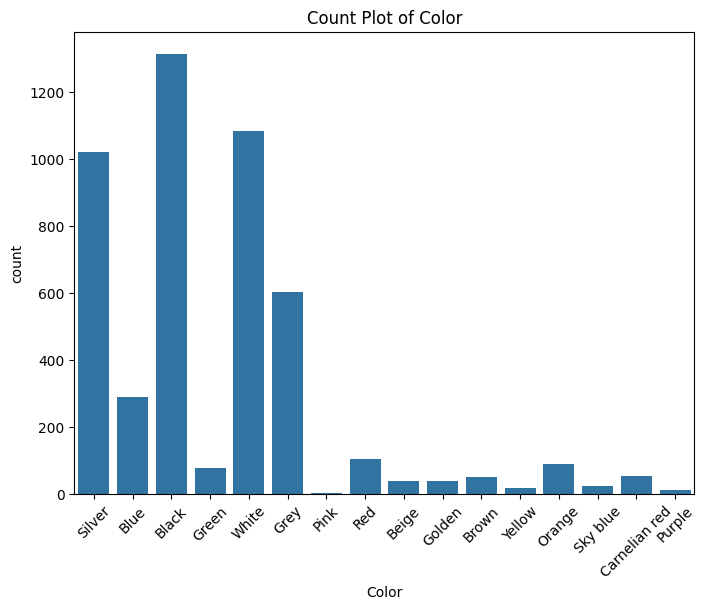

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Color')
plt.title('Count Plot of Color')
plt.xticks(rotation=45)
plt.show()


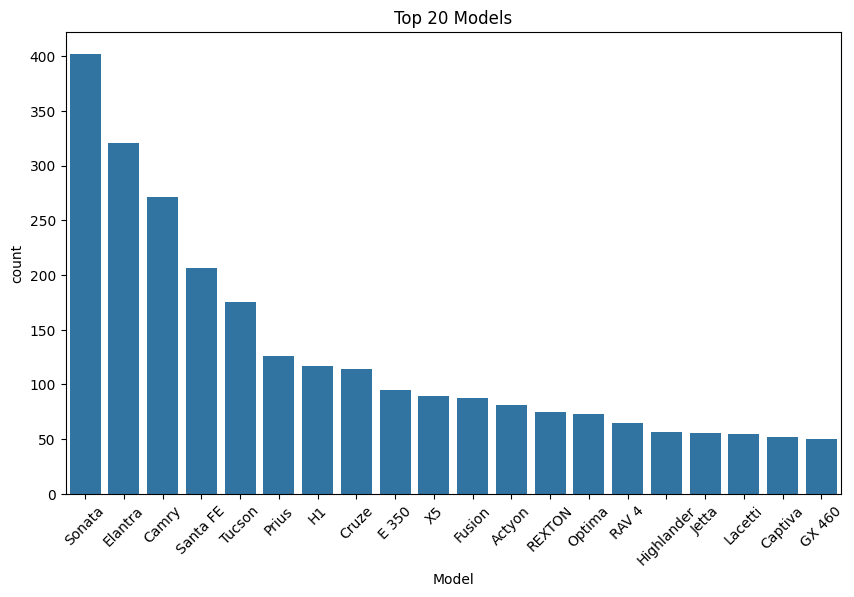

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Model', order=df['Model'].value_counts().index[:20])
plt.title('Top 20 Models')
plt.xticks(rotation=45)
plt.show()


# Bi-Variate Visual Analysis

## Price vs. Manufacturer


In [ ]:
df_Manufacturer = df.groupby(['Manufacturer'])['Price'].max().reset_index().sort_values(by='Price',ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_10032\3357959118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_Manufacturer, x='Manufacturer', y='Price', palette='viridis',legend=False)
d:\cuvute\Modules\Ml Solutions\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


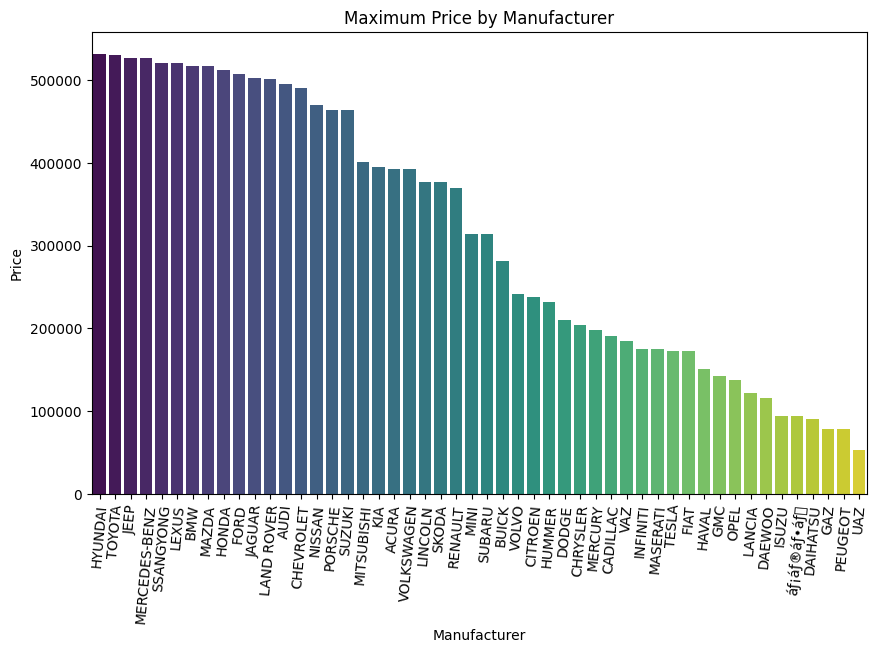

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_Manufacturer, x='Manufacturer', y='Price', palette='viridis',legend=False)
plt.title('Maximum Price by Manufacturer')
plt.xticks(rotation=85)
plt.show()

## Drive Wheel vs. Price


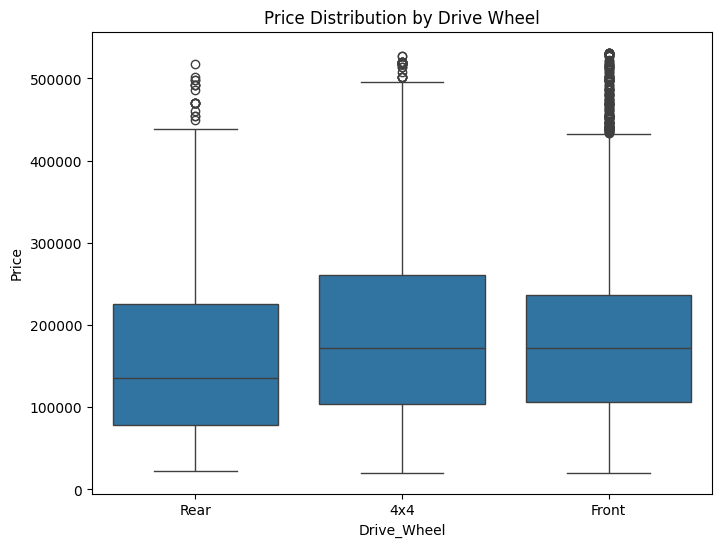

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Drive_Wheel', y='Price')
plt.title('Price Distribution by Drive Wheel')
plt.show()


## Kilometers_Driven vs Price

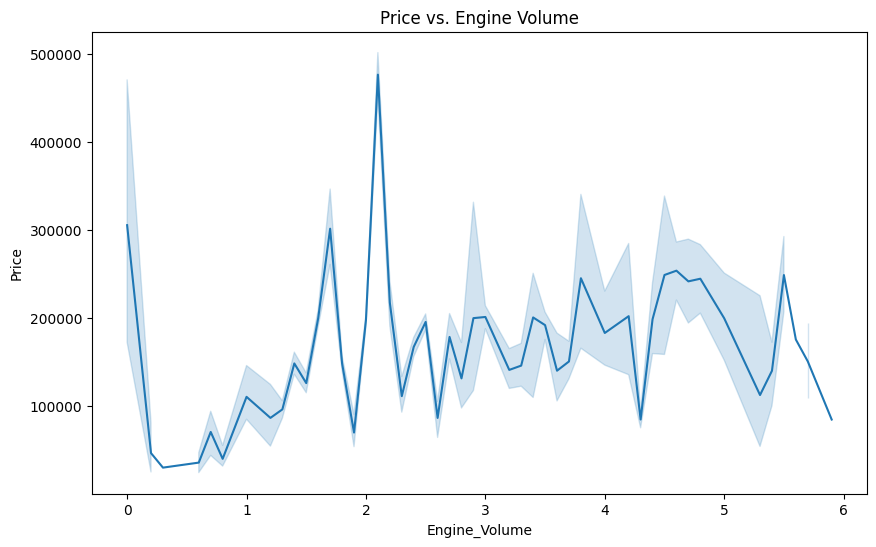

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Engine_Volume', y='Price', )
plt.title('Price vs. Engine Volume')
plt.show()


## Color Vs Price

In [ ]:
# Sort the data by the mean of 'Price' for each 'Color'
sorted_df = df.groupby('Color', as_index=False)['Price'].mean().sort_values(by='Price',ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='Color', y='Price', order=sorted_df['Color'])
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Barplot of Price by Color')
plt.xticks(rotation=75)
plt.show()


## Price vs. Engine Volume


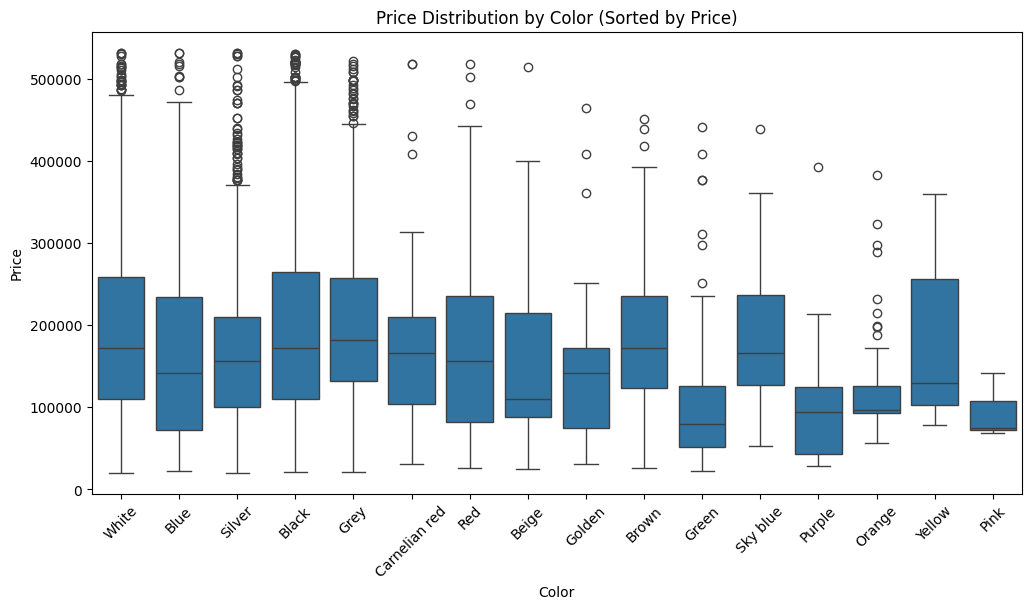

In [ ]:
# Sort the DataFrame by 'Price'
sorted_df = df.sort_values(by='Price', ascending=False)

# Create the boxplot with sorted data
plt.figure(figsize=(12, 6))
sns.boxplot(data=sorted_df, x='Color', y='Price')
plt.title('Price Distribution by Color (Sorted by Price)')
plt.xticks(rotation=45)
plt.show()


## Gear_Box_Type Vs Engine Volume

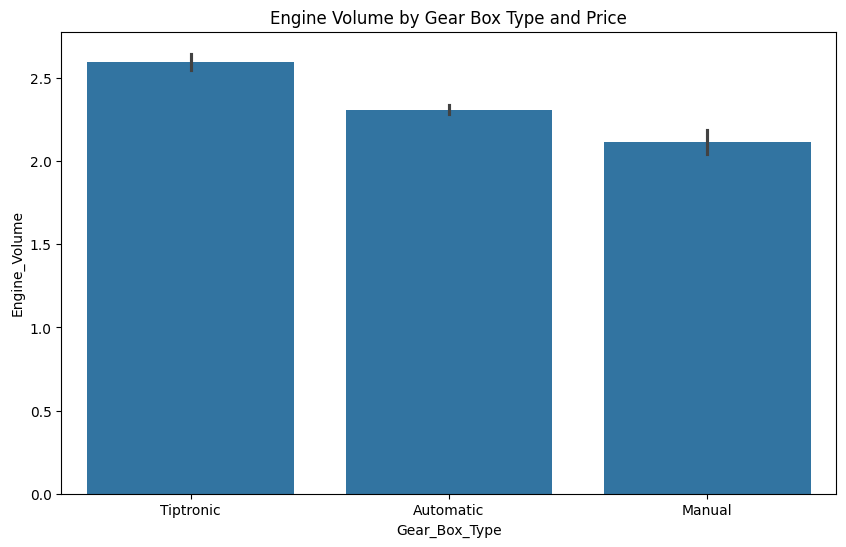

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gear_Box_Type', y='Engine_Volume')
plt.title('Engine Volume by Gear Box Type and Price')
plt.show()


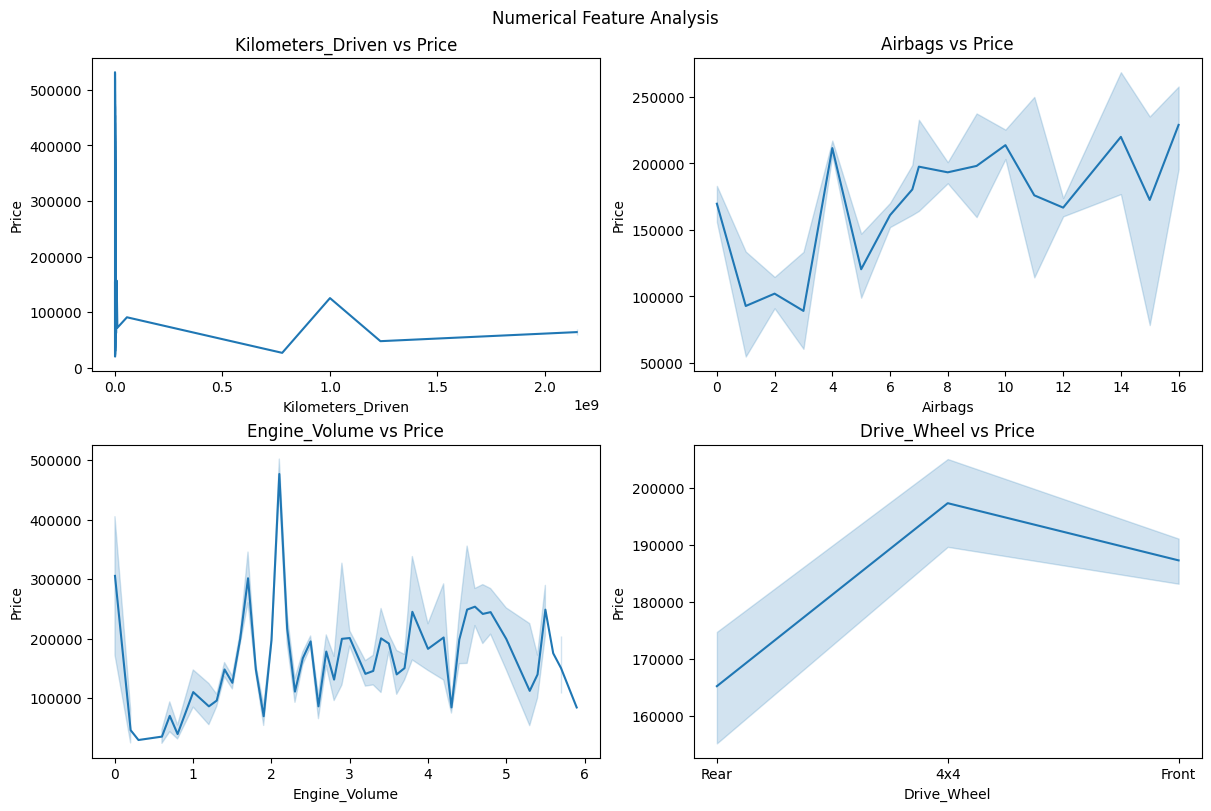

In [ ]:
# Assuming 'df' is your DataFrame with the relevant columns
fig, axs = plt.subplots(2, 2, figsize=(12,8), constrained_layout=True)
fig.suptitle("Numerical Feature Analysis")

# Row 1
axs[0, 0].set_title("Kilometers_Driven vs Price")
sns.lineplot(data=df, x='Kilometers_Driven', y='Price', ax=axs[0, 0])

axs[0, 1].set_title("Airbags vs Price")
sns.lineplot(data=df, x='Airbags', y='Price', ax=axs[0, 1])

# Row 2
axs[1 ,0].set_title("Engine_Volume vs Price")
sns.lineplot(data=df, x='Engine_Volume', y='Price', ax=axs[1, 0])

axs[1, 1].set_title("Drive_Wheel vs Price")
sns.lineplot(data=df, x='Drive_Wheel', y='Price', ax=axs[1, 1])


plt.show()


## Group by Manufacturer, Model, Category, and Color, and calculate the max Price

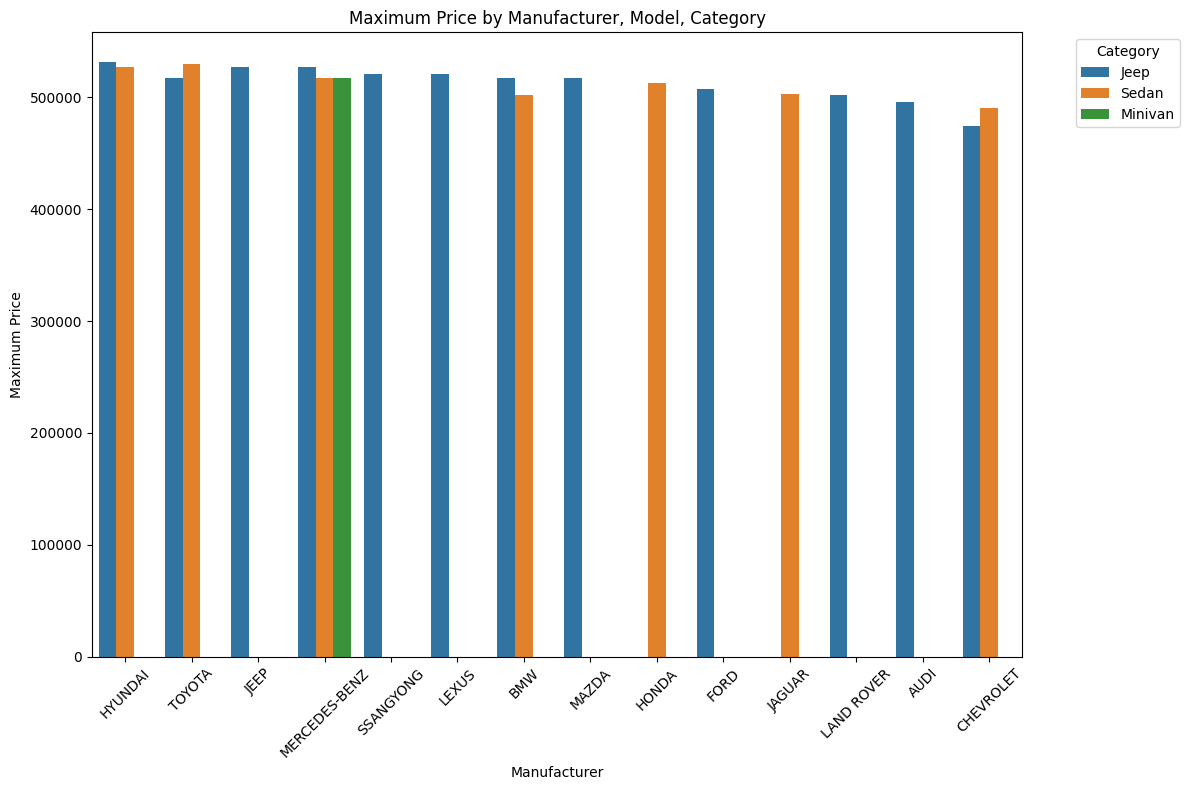

In [ ]:
grouped_data = df.groupby(['Manufacturer', 'Category'])['Price'].max().reset_index()
# Sort the grouped data by Price in descending order and get the top 5
top_5_data = grouped_data.sort_values(by='Price', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_data,
    x='Manufacturer',
    y='Price',
    hue='Category'
)

# Customize the plot
plt.title("Maximum Price by Manufacturer, Model, Category")
plt.xlabel("Manufacturer")
plt.ylabel("Maximum Price")
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


##  Manufacturer, Category Vs Price

d:\cuvute\Modules\Ml Solutions\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
d:\cuvute\Modules\Ml Solutions\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


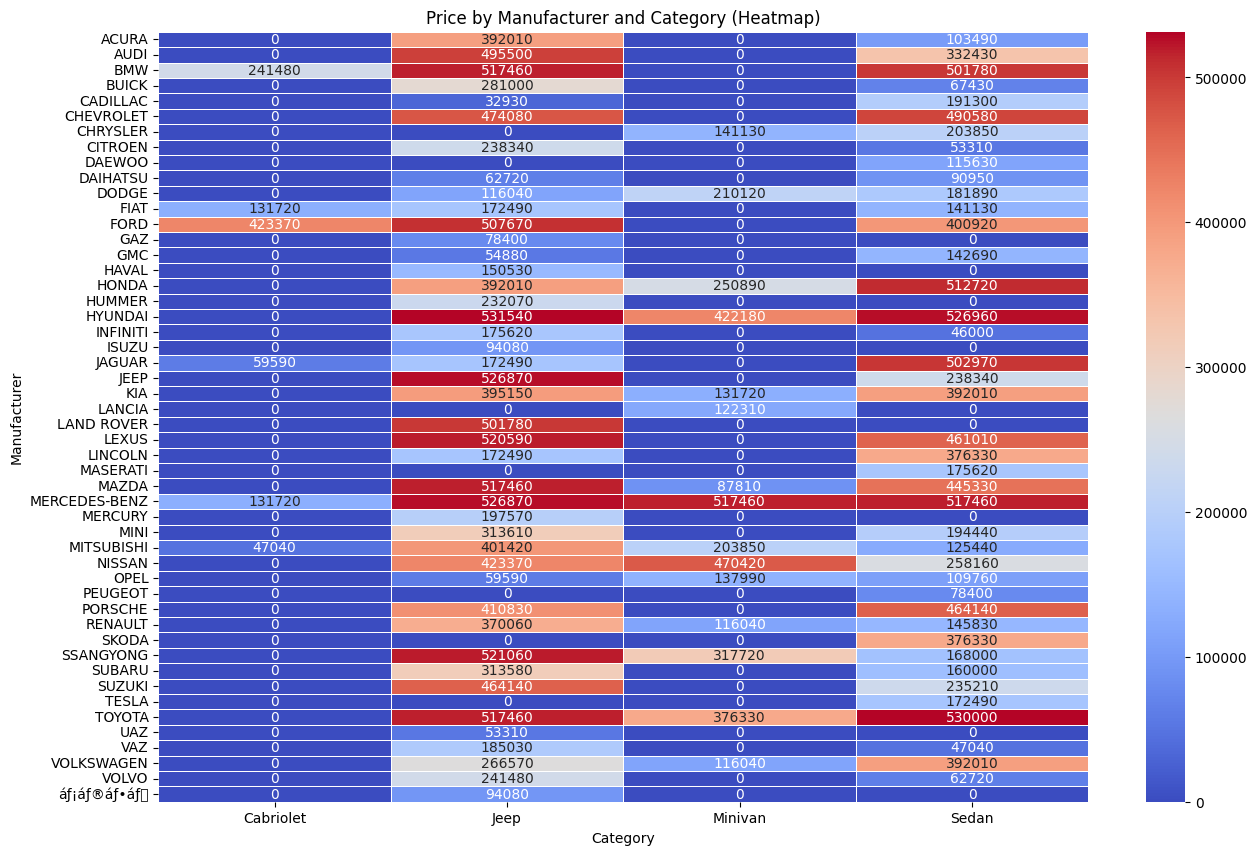

In [ ]:
# Pivot the data for heatmap visualization
df_pivot = df.groupby(['Manufacturer', 'Category'])['Price'].max().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot, annot=True, fmt='g', cmap='coolwarm', linewidths=0.5)
plt.title('Price by Manufacturer and Category (Heatmap)')
plt.xlabel('Category')
plt.ylabel('Manufacturer')
plt.show()


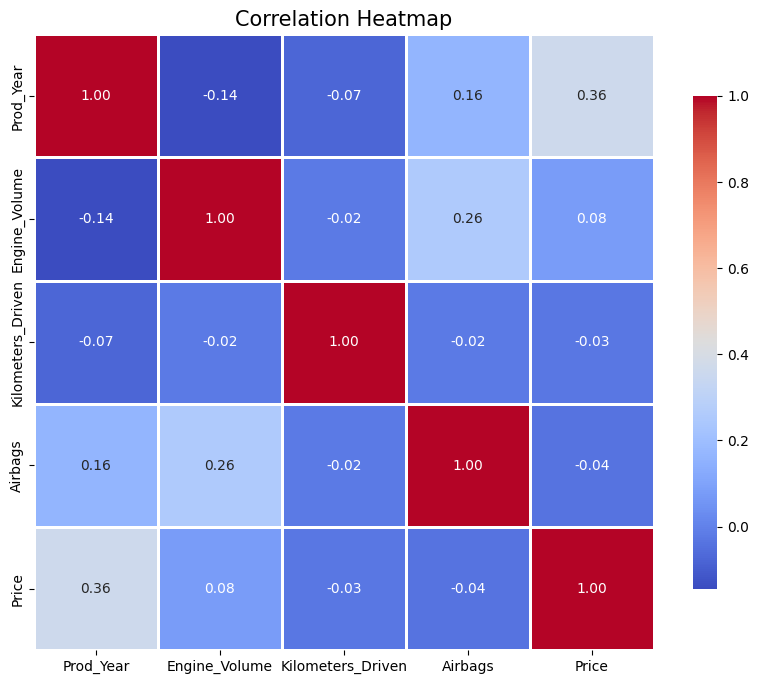

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and drop 'Id' column
df1 = df.select_dtypes(include='number').drop(columns='Id')

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations, color gradient, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.8, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})


plt.title('Correlation Heatmap', fontsize=15)

plt.show()
